<a href="https://colab.research.google.com/github/uss96/CodingTest/blob/master/%EB%B9%85%EB%B6%84%EA%B8%B0%EC%8B%A4%EA%B8%B0(%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
from sklearn.preprocessing import LabelEncoder
df["species"] = LabelEncoder().fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df_copy = df

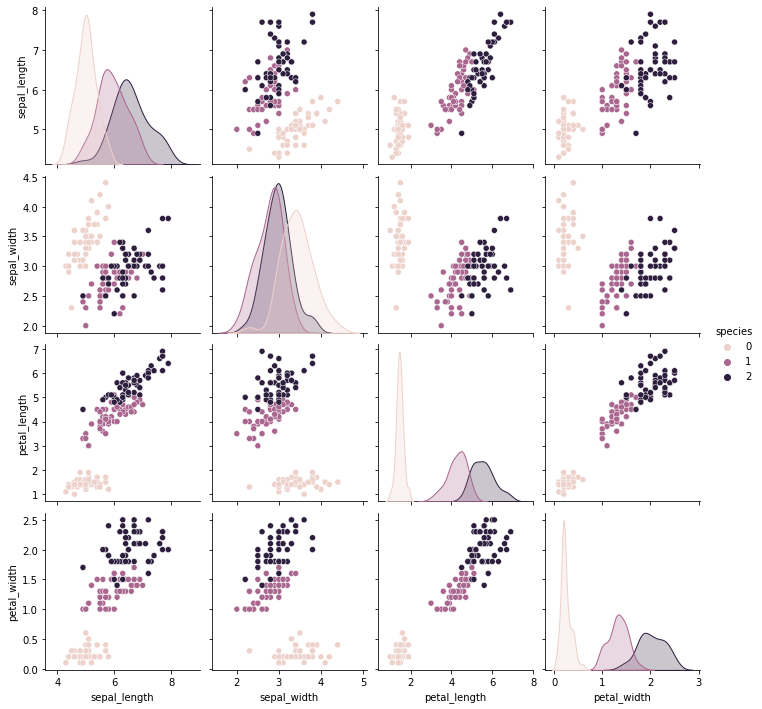

In [7]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
sns.pairplot(df, hue="species")
plt.show()

In [11]:
cluster1 = KMeans(n_clusters=3, n_init=10, max_iter=500, random_state=42, algorithm='auto')

cluster1.fit(df)
KMeans(max_iter=500, n_clusters=3, random_state=42)

KMeans(max_iter=500, n_clusters=3, random_state=42)

In [12]:
cluster_center = cluster1.cluster_centers_
cluster_prediction = cluster1.predict(df)
print(pd.DataFrame(cluster_center))
print(cluster_prediction)

          0         1         2         3         4
0  6.622449  2.983673  5.573469  2.032653  2.000000
1  5.006000  3.428000  1.462000  0.246000  0.000000
2  5.915686  2.764706  4.264706  1.333333  1.019608
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [13]:
df_copy["cluster"] = cluster_prediction
df_copy

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


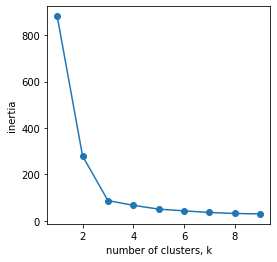

In [14]:
scope = range(1, 10)
inertias = []

for k in scope :
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

plt.figure(figsize=(4, 4))
plt.plot(scope, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from mlxtend.frequent_patterns import apriori, association_rules

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PART 02 파이썬 분석/csv/retail_dataset.csv', sep = ',')
df

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
310,Bread,Eggs,Cheese,NaN,NaN,NaN,NaN
311,Meat,Milk,Pencil,NaN,NaN,NaN,NaN
312,Bread,Cheese,Eggs,Meat,Pencil,Diaper,Wine
313,Meat,Cheese,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       315 non-null    object
 1   1       285 non-null    object
 2   2       245 non-null    object
 3   3       187 non-null    object
 4   4       133 non-null    object
 5   5       71 non-null     object
 6   6       41 non-null     object
dtypes: object(7)
memory usage: 17.4+ KB


In [23]:
items = set()
for col in df : 
    items.update(df[col].unique())

itemset = set(items)
encoding = []
for index, row in df.iterrows() :
    rowset = set(row)
    labels = {}
    dismatching = list(itemset - rowset)
    matching = list(itemset.intersection(rowset))
    for i in dismatching :
        labels[i] = 0
    for j in matching : 
        labels[j] = 1
    encoding.append(labels)
encoding[0]
result = pd.DataFrame(encoding)

result

,NaN,Milk,Bagel,Meat,Diaper,Eggs,Pencil,Bread,Cheese,Wine
0,0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,1,0,1,1,1,1
2,1,1,0,1,0,1,0,0,1,1
3,1,1,0,1,0,1,0,0,1,1
4,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,0,0,1,0,1,1,0
311,1,1,0,1,0,0,1,0,0,0
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,1,0,0,0,0,1,0


In [24]:
result = result.drop(result.columns[0], axis=1)
result

,Milk,Bagel,Meat,Diaper,Eggs,Pencil,Bread,Cheese,Wine
0,0,0,1,1,1,1,1,1,1
1,1,0,1,1,0,1,1,1,1
2,1,0,1,0,1,0,0,1,1
3,1,0,1,0,1,0,0,1,1
4,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,1,0,1,1,0
311,1,0,1,0,0,1,0,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,1,0,0,0,0,1,0


In [25]:
freq_items = apriori(result, min_support=0.2, use_colnames=True)

In [26]:
rules = association_rules(freq_items, metric='confidence', min_threshold = 0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Cheese),(Meat),0.501587,0.476190,0.323810,0.645570,1.355696,0.084958,1.477891
